# Classification - Predicting whether a person will accept the coupon recommended to them in different driving scenarios  (Fall 2021 ML Model Project)   

## By Alex John Huggler


  
    
      
      





<div class="alert alert-block alert-success">
<br></b> The in-vehicle coupon recommendation dataset was sourced from UCI Machine learning repository.  </br>
    <br><a href="https://archive.ics.uci.edu/ml/datasets/in-vehicle+coupon+recommendation">UCI Machine learning repository - in vehicle coupon recommendation dataset</a>
</div>










## Context of the document : 
    
    1. Data Description 
    2. Classification Project Summary
    3. Data Preprocessing Summary
    4. Data Cleaning and Imputation
    5. Modeling 
    6. Conclusion

## 1. Data Description 
     1. destination:                   No Urgent Place, Home, Work
     2. passanger:                     Alone, Friend(s), Kid(s), Partner (who are the passengers in the car)                                     
     3. weather:                       Sunny, Rainy, Snowy
     4. temperature:                   55, 80, 30
     5. time:                          2PM, 10AM, 6PM, 7AM, 10PM
     6. coupon:                        Restaurant(<$20), Coffee House, Carry out & Take away, Bar, Restaurant($20-$50)
     7. expiration:                    1d, 2h (the coupon expires in 1 day or in 2 hours)
                                       
     8. gender:                        Female, Male
     9. age:                           21, 46, 26, 31, 41, 50plus, 36, below21
                                       
    10. maritalStatus:                 Unmarried partner, Single, Married partner, Divorced, Widowed
    11. has_Children:                  1, 0
    12. education:                     Some college - no degree, Bachelors degree, Associates degree, High School Graduate,  
                                       Graduate degree (Masters or Doctorate), Some High School
    
    
                                       
    13. occupation:                    Unemployed, Architecture & Engineering, Student,
                                       Education&Training&Library, Healthcare Support,
                                       Healthcare Practitioners & Technical, Sales & Related, Management,
                                       Arts Design Entertainment Sports & Media, Computer & Mathematical,
                                       Life Physical Social Science, Personal Care & Service,
                                       Community & Social Services, Office & Administrative Support,
                                       Construction & Extraction, Legal, Retired,
                                       Installation Maintenance & Repair, Transportation & Material Moving,
                                       Business & Financial, Protective Service,
                                       Food Preparation & Serving Related, Production Occupations,
                                       Building & Grounds Cleaning & Maintenance, Farming Fishing & Forestry
                                       
    14. income:                        $37500 - $49999, $62500 - $74999, $12500 - $24999, $75000 - $87499,
                                       $50000 - $62499, $25000 - $37499, $100000 or More, $87500 - $99999, Less than $12500
                                       
    15. Bar:                           never, less1, 1~3, gt8, nan4~8 (feature meaning: how many times do you go to a bar  
                                       every month?)
    
    16. CoffeeHouse:                   never, less1, 4~8, 1~3, gt8, nan (feature meaning: how many times do you go to a  
                                       coffeehouse every month?)
    
    17. CarryAway:                     n4~8, 1~3, gt8, less1, never (feature meaning: how many times do you get take-away  
                                       food every month?)
    
    18. RestaurantLessThan20:          4~8, 1~3, less1, gt8, never (feature meaning: how many times do you go to a  
                                       restaurant with an average expense per person of less than $20 every month?)
    
    19. Restaurant20To50:              1~3, less1, never, gt8, 4~8, nan (feature meaning: how many times do you go to a  
                                       restaurant with average expense per person of $20 - $50 every month?)
    
    20. toCoupon_GEQ15min:             0,1 (feature meaning: driving distance to the restaurant/bar for using the coupon is  
                                       greater than 15 minutes)
    
    21. toCoupon_GEQ25min:             0, 1 (feature meaning: driving distance to the restaurant/bar for using the coupon is  
                                       greater than 25 minutes)
    
    22. direction_same:                0, 1 (feature meaning: whether the restaurant/bar is in the same direction as your  
                                       current destination)
    
    23. direction_opp:                 1, 0 (feature meaning: whether the restaurant/bar is in the same direction as your  
                                       current destination)
                                     
    24. Y:                             1, 0 (whether the coupon is accepted)
                    

# 2. Project 1: Classification Description


For the classification portion of this project, I decided on using the in-vehicle-coupon-recommendation data set from UC Irvine. The goal of this data set is to determine whether an individual will accept a coupon that's recommeneded to the individual, in different driving scenarios. In order to accurately determine whether a coupon was to be accepted, I decided to use KNN, Logistic Regression, Decision Tree, Kernelized Support Vector Machine, and Linear Support Vector Machine classification models. In addition, I decided on going with the AUC-ROC curve as my main classification evaluation strategy, rather than accuracy, for several reasons.

The reason for using the AUC-ROC curve, was because the ROC curve is the graphical representation of the true positive rate of a classifier plotted against the false positive rate of a classifier. Since the area under the curve is the measure of the ability of a classifier to distinguish between classes, I decided that it'd be a great determiner of the quality of each model's predictions. For these reasons, the AUC score would be a more suitable evaluation strategy than accuracy. In addition to this, various tuning parameters were applied to each model and GridSearchCV was used to loop through hyperparameters, in order to effectively select the best parameters for the models.

In [93]:
#Imports relevant packages and sets path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()


import os
os.getcwd()
os.chdir('C:/Users/12108/Desktop/UT Dallas Spring 2021/BUAN 6341/Project 1')

In [2]:
classdata = pd.read_csv(r'C:\Users\12108\Desktop\UT Dallas Spring 2021\BUAN 6341\Project 1\in-vehicle-coupon-recommendation.csv')

## 3. Data Preprocessing Summary

For data preprocessing, the only item adjusted prior to placing np.nan values into our data, was the removal of the column 'cars', as it had only 108 non-null values. The lack of values in this column, made it impossible to decipher what the make up of the column's values could be. Therefore, the column was dropped.  
  
In addition to this, 16,007 null values were added to the data set, to allow for preprocessing practice, which accounted for 5% of the 317,100 total values in the data set. The nulls were spread across 8 separate columns, which contained categorical and numeric variables. Histograms were then used to evaluate distributions of values in columns to decide what method would be best for imputing the null values. After having imputed each column, one-hot encording was then used to modify categorical data. As most of the data consisted of categorical data, one hot encoding increased the dimensionality of the feature set from 25 columns to 108 columns. Despite this large jump in feature columns, I believed the increase would allow a further glimpse into the nuance within the dataset, thereby allowing a more accurate prediction of coupon acceptance.


# 4. Data Cleaning and Imputation

In [3]:
classdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [ ]:
# Drops Column "car" as the column consists of only 108 values, which are non-null
classdata.drop(['car'], inplace = True, axis = 1)



### Placece np.nan values into the dataset

In [5]:
# Placece np.nan values into the dataset
cols = [2, 3, 7, 8, 10, 21, 22, 23]
np.random.seed(0)
masking_array = np.random.randint(100, size = (classdata.shape[0], 8)) < 85
classdata[classdata.columns[cols]] = classdata[classdata.columns[cols]].where(masking_array, np.nan)

In [6]:
classdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   destination           12684 non-null  object 
 1   passanger             12684 non-null  object 
 2   weather               10784 non-null  object 
 3   temperature           10793 non-null  float64
 4   time                  12684 non-null  object 
 5   coupon                12684 non-null  object 
 6   expiration            12684 non-null  object 
 7   gender                10726 non-null  object 
 8   age                   10779 non-null  object 
 9   maritalStatus         12684 non-null  object 
 10  has_children          10769 non-null  float64
 11  education             12684 non-null  object 
 12  occupation            12684 non-null  object 
 13  income                12684 non-null  object 
 14  Bar                   12577 non-null  object 
 15  CoffeeHouse        

In [7]:
classdata.isnull().sum().sum()

16007

In [8]:
classdata['weather'].unique()

array(['Sunny', nan, 'Rainy', 'Snowy'], dtype=object)

<AxesSubplot:>

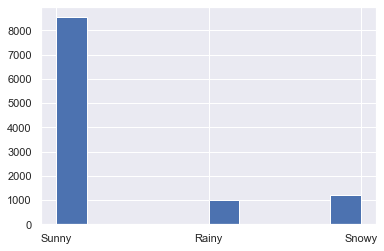

In [9]:
classdata['weather'].hist()

In [10]:
# Replaces np.nan in 'weather' column, with the most frequently occurring value in the data set
classdata['weather'].replace({np.nan: "Sunny"}, inplace=True)
classdata['weather'].value_counts()

Sunny    10443
Snowy     1219
Rainy     1022
Name: weather, dtype: int64

In [11]:
classdata['RestaurantLessThan20'].unique()
classdata['RestaurantLessThan20'].hist()

array(['4~8', '1~3', 'less1', 'gt8', nan, 'never'], dtype=object)

In [12]:
classdata['RestaurantLessThan20'].value_counts()

1~3      5376
4~8      3580
less1    2093
gt8      1285
never     220
Name: RestaurantLessThan20, dtype: int64

In [13]:
classdata['RestaurantLessThan20'].unique()

array(['4~8', '1~3', 'less1', 'gt8', nan, 'never'], dtype=object)

In [14]:
classdata['RestaurantLessThan20'].replace({np.nan: "1~3"}, inplace=True)

In [15]:
classdata['RestaurantLessThan20'].unique()

array(['4~8', '1~3', 'less1', 'gt8', 'never'], dtype=object)

In [16]:
classdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   destination           12684 non-null  object 
 1   passanger             12684 non-null  object 
 2   weather               12684 non-null  object 
 3   temperature           10793 non-null  float64
 4   time                  12684 non-null  object 
 5   coupon                12684 non-null  object 
 6   expiration            12684 non-null  object 
 7   gender                10726 non-null  object 
 8   age                   10779 non-null  object 
 9   maritalStatus         12684 non-null  object 
 10  has_children          10769 non-null  float64
 11  education             12684 non-null  object 
 12  occupation            12684 non-null  object 
 13  income                12684 non-null  object 
 14  Bar                   12577 non-null  object 
 15  CoffeeHouse        

In [17]:
classdata['Restaurant20To50'].value_counts()

less1    6077
1~3      3290
never    2136
4~8       728
gt8       264
Name: Restaurant20To50, dtype: int64

In [18]:
classdata['Restaurant20To50'].unique()
classdata['Restaurant20To50'].hist()

array(['1~3', 'less1', 'never', 'gt8', '4~8', nan], dtype=object)

In [19]:
classdata['Restaurant20To50'].replace({np.nan: "less1"}, inplace=True)

In [20]:
classdata['age'].value_counts()

21         2274
26         2142
31         1737
50plus     1518
36         1115
41          935
46          587
below21     471
Name: age, dtype: int64

In [21]:
classdata['age'].unique()

array(['21', nan, '46', '26', '31', '41', '50plus', '36', 'below21'],
      dtype=object)

In [22]:
# Replacing np.nan with the average of the top 3 values.

classdata['age'].replace({np.nan: "27.67"}, inplace=True)

In [23]:
classdata['age'].value_counts()

21         2274
26         2142
27.67      1905
31         1737
50plus     1518
36         1115
41          935
46          587
below21     471
Name: age, dtype: int64

In [24]:
classdata['temperature'].value_counts()

80.0    5567
55.0    3263
30.0    1963
Name: temperature, dtype: int64

In [25]:
classdata['temperature'].unique()

array([55., nan, 80., 30.])

In [26]:
classdata['temperature'].replace({np.nan: "80.0"}, inplace=True)

In [27]:
classdata['Bar'].value_counts()

never    5197
less1    3482
1~3      2473
4~8      1076
gt8       349
Name: Bar, dtype: int64

In [28]:
classdata['Bar'].replace({np.nan: "never"}, inplace=True)
classdata['Bar'].replace({"less1": "never"}, inplace=True)

In [29]:
classdata['Bar'].value_counts()

never    8786
1~3      2473
4~8      1076
gt8       349
Name: Bar, dtype: int64

In [30]:
classdata['CarryAway'].value_counts()

1~3      4672
4~8      4258
less1    1856
gt8      1594
never     153
Name: CarryAway, dtype: int64

In [31]:
classdata['CarryAway'].unique()

array([nan, '4~8', '1~3', 'gt8', 'less1', 'never'], dtype=object)

In [32]:
classdata['CarryAway'].replace({np.nan: "4~8"}, inplace=True)

In [33]:
classdata['education'].value_counts()

Some college - no degree                  4351
Bachelors degree                          4335
Graduate degree (Masters or Doctorate)    1852
Associates degree                         1153
High School Graduate                       905
Some High School                            88
Name: education, dtype: int64

In [34]:
classdata['education'].unique()

array(['Some college - no degree', 'Bachelors degree',
       'Associates degree', 'High School Graduate',
       'Graduate degree (Masters or Doctorate)', 'Some High School'],
      dtype=object)

In [35]:
#Gets frequency distribution of Education values. Over 91% of this population has had at least some college. Over 57% has received a degree. 
classdata['education'].value_counts() / len(classdata)

Some college - no degree                  0.343031
Bachelors degree                          0.341769
Graduate degree (Masters or Doctorate)    0.146011
Associates degree                         0.090902
High School Graduate                      0.071350
Some High School                          0.006938
Name: education, dtype: float64

In [36]:
# Fills gender column based on proportion of freq dist.
mask = classdata['gender'].isna() 
ind = classdata['gender'].loc[mask].sample(frac=0.512).index
classdata.loc[ind, 'gender'] = 'Female'
classdata['gender'] = classdata['gender'].fillna('Male')
print(classdata['gender'])

0        Female
1        Female
2        Female
3        Female
4          Male
          ...  
12679    Female
12680      Male
12681      Male
12682      Male
12683      Male
Name: gender, Length: 12684, dtype: object


###### 

In [37]:
classdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   destination           12684 non-null  object 
 1   passanger             12684 non-null  object 
 2   weather               12684 non-null  object 
 3   temperature           12684 non-null  object 
 4   time                  12684 non-null  object 
 5   coupon                12684 non-null  object 
 6   expiration            12684 non-null  object 
 7   gender                12684 non-null  object 
 8   age                   12684 non-null  object 
 9   maritalStatus         12684 non-null  object 
 10  has_children          10769 non-null  float64
 11  education             12684 non-null  object 
 12  occupation            12684 non-null  object 
 13  income                12684 non-null  object 
 14  Bar                   12684 non-null  object 
 15  CoffeeHouse        

In [38]:
classdata.isnull().sum()

destination                0
passanger                  0
weather                    0
temperature                0
time                       0
coupon                     0
expiration                 0
gender                     0
age                        0
maritalStatus              0
has_children            1915
education                  0
occupation                 0
income                     0
Bar                        0
CoffeeHouse              217
CarryAway                  0
RestaurantLessThan20       0
Restaurant20To50           0
toCoupon_GEQ5min           0
toCoupon_GEQ15min          0
toCoupon_GEQ25min       1853
direction_same          1860
direction_opp           1931
Y                          0
dtype: int64

In [39]:
# Fills Gender Column, so that distribution matches current ratio between female and male

mask = classdata['gender'].isna() 
ind = classdata['gender'].loc[mask].sample(frac=0.512).index
classdata.loc[ind, 'gender'] = 'Female'
classdata['gender'] = classdata['gender'].fillna('Male')
print(classdata['gender'])

0        Female
1        Female
2        Female
3        Female
4          Male
          ...  
12679    Female
12680      Male
12681      Male
12682      Male
12683      Male
Name: gender, Length: 12684, dtype: object


In [40]:
classdata['gender'].value_counts()


Female    6485
Male      6199
Name: gender, dtype: int64

In [41]:
classdata['has_children'].value_counts()

0.0    6304
1.0    4465
Name: has_children, dtype: int64

In [42]:
classdata['CoffeeHouse'].unique()

array(['never', 'less1', '4~8', '1~3', 'gt8', nan], dtype=object)

In [43]:
classdata['CoffeeHouse'].value_counts()

less1    3385
1~3      3225
never    2962
4~8      1784
gt8      1111
Name: CoffeeHouse, dtype: int64

In [44]:
classdata['CoffeeHouse'].replace({np.nan: "1~3"}, inplace=True)

In [45]:
classdata.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55.0,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,4~8,4~8,1~3,1,0,0.0,0.0,1.0,1
1,No Urgent Place,Friend(s),Sunny,80.0,10AM,Coffee House,2h,Female,27.67,Unmarried partner,...,never,4~8,4~8,1~3,1,0,0.0,0.0,1.0,0
2,No Urgent Place,Friend(s),Sunny,80.0,10AM,Carry out & Take away,2h,Female,27.67,Unmarried partner,...,never,4~8,4~8,1~3,1,1,0.0,0.0,1.0,1
3,No Urgent Place,Friend(s),Sunny,80.0,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,4~8,4~8,1~3,1,1,0.0,0.0,1.0,0
4,No Urgent Place,Friend(s),Sunny,80.0,2PM,Coffee House,1d,Male,21,Unmarried partner,...,never,4~8,4~8,1~3,1,1,0.0,0.0,1.0,0


In [46]:
classdata['temperature'].value_counts()


80.0    5567
55.0    3263
30.0    1963
80.0    1891
Name: temperature, dtype: int64

In [47]:
classdata.isnull().sum()

destination                0
passanger                  0
weather                    0
temperature                0
time                       0
coupon                     0
expiration                 0
gender                     0
age                        0
maritalStatus              0
has_children            1915
education                  0
occupation                 0
income                     0
Bar                        0
CoffeeHouse                0
CarryAway                  0
RestaurantLessThan20       0
Restaurant20To50           0
toCoupon_GEQ5min           0
toCoupon_GEQ15min          0
toCoupon_GEQ25min       1853
direction_same          1860
direction_opp           1931
Y                          0
dtype: int64

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
12679    0.0
12680    1.0
12681    0.0
12682    1.0
12683    0.0
Name: direction_opp, Length: 12684, dtype: float64


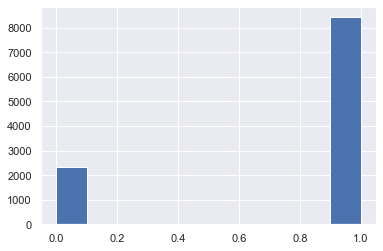

In [48]:
classdata['direction_opp'].hist()
# Fills Gender Column, so that distribution matches current ratio between female and male

mask = classdata['direction_opp'].isna() 
ind = classdata['direction_opp'].loc[mask].sample(frac=0.78).index
classdata.loc[ind, 'direction_opp'] = 1
classdata['direction_opp'] = classdata['direction_opp'].fillna(0)
print(classdata['direction_opp'])

In [49]:
classdata['direction_opp'].value_counts()

1.0    9936
0.0    2748
Name: direction_opp, dtype: int64

In [50]:
classdata['direction_opp'].unique()

array([1., 0.])

<AxesSubplot:>

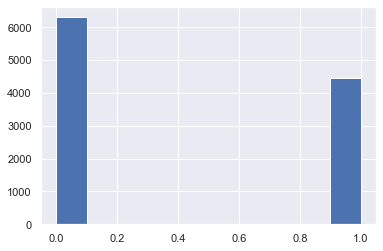

In [51]:
classdata['has_children'].hist()

In [52]:
# Replaces np.nan with 1's and 0's, to match relative proportion in data
mask = classdata['has_children'].isna() 
ind = classdata['has_children'].loc[mask].sample(frac=0.585).index
classdata.loc[ind, 'has_children'] = 0
classdata['has_children'] = classdata['has_children'].fillna(1)
print(classdata['has_children'])

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
12679    0.0
12680    0.0
12681    0.0
12682    0.0
12683    0.0
Name: has_children, Length: 12684, dtype: float64


In [53]:
classdata['has_children'].value_counts()

0.0    7424
1.0    5260
Name: has_children, dtype: int64

<AxesSubplot:>

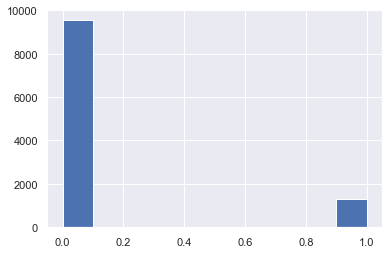

In [54]:
classdata['toCoupon_GEQ25min'].hist()

In [55]:
classdata['toCoupon_GEQ25min'].value_counts()

0.0    9541
1.0    1290
Name: toCoupon_GEQ25min, dtype: int64

<AxesSubplot:>

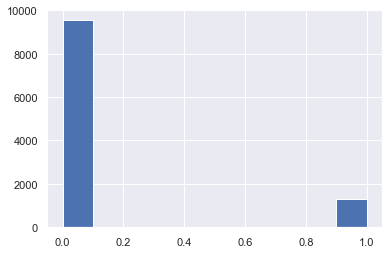

In [56]:
classdata['toCoupon_GEQ25min'].hist()

In [57]:
# Changes Values for Direction same column, to match the relative proportion of values in the column
mask = classdata['toCoupon_GEQ25min'].isna() 
ind = classdata['toCoupon_GEQ25min'].loc[mask].sample(frac=0.88).index
classdata.loc[ind, 'toCoupon_GEQ25min'] = 0
classdata['toCoupon_GEQ25min'] = classdata['toCoupon_GEQ25min'].fillna(1)
print(classdata['toCoupon_GEQ25min'])

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
12679    0.0
12680    0.0
12681    0.0
12682    1.0
12683    0.0
Name: toCoupon_GEQ25min, Length: 12684, dtype: float64


<AxesSubplot:>

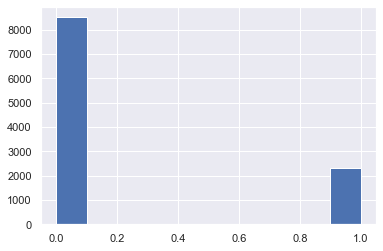

In [58]:
classdata['direction_same'].hist()

In [59]:
classdata['direction_same'].value_counts()

0.0    8507
1.0    2317
Name: direction_same, dtype: int64

<AxesSubplot:>

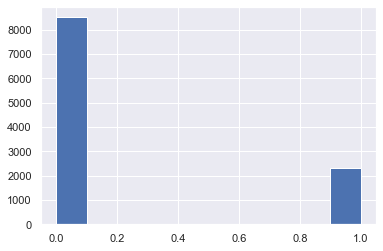

In [60]:
classdata['direction_same'].hist()

In [61]:
# Changes Values for Direction same column, to match the relative proportion of values in the column
mask = classdata['direction_same'].isna() 
ind = classdata['direction_same'].loc[mask].sample(frac=0.785).index
classdata.loc[ind, 'direction_same'] = 0
classdata['direction_same'] = classdata['direction_same'].fillna(1)


In [62]:
classdata.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

### Transforming categorical variables in feature set

In [63]:
#Assigning the cleaned data to a new name "cleandata"
cleandata=classdata

In [65]:
# Turns Categorical Data into One Hot Vectors 
cleandata=pd.concat([cleandata.drop('destination', axis=1), pd.get_dummies(cleandata['destination'],prefix='destination',drop_first=False)], axis=1)
cleandata=pd.concat([cleandata.drop('passanger', axis=1), pd.get_dummies(cleandata['passanger'],prefix='passanger',drop_first=False)], axis=1)
cleandata=pd.concat([cleandata.drop('weather', axis=1), pd.get_dummies(cleandata['weather'],prefix='weather',drop_first=False)], axis=1)
cleandata=pd.concat([cleandata.drop('time', axis=1), pd.get_dummies(cleandata['time'],prefix='time',drop_first=False)], axis=1)
cleandata=pd.concat([cleandata.drop('coupon', axis=1), pd.get_dummies(cleandata['coupon'],prefix='coupon',drop_first=False)], axis=1)
cleandata=pd.concat([cleandata.drop('expiration', axis=1), pd.get_dummies(cleandata['expiration'],prefix='expiration',drop_first=False)], axis=1)
cleandata=pd.concat([cleandata.drop('age', axis=1), pd.get_dummies(cleandata['age'],prefix='age',drop_first=False)], axis=1)
cleandata=pd.concat([cleandata.drop('maritalStatus', axis=1), pd.get_dummies(cleandata['maritalStatus'],prefix='maritalStatus',drop_first=False)], axis=1)
cleandata=pd.concat([cleandata.drop('education', axis=1), pd.get_dummies(cleandata['education'],prefix='education',drop_first=False)], axis=1)
cleandata=pd.concat([cleandata.drop('occupation', axis=1), pd.get_dummies(cleandata['occupation'],prefix='occupation',drop_first=False)], axis=1)
cleandata=pd.concat([cleandata.drop('income', axis=1), pd.get_dummies(cleandata['income'],prefix='income',drop_first=False)], axis=1)
cleandata=pd.concat([cleandata.drop('Bar', axis=1), pd.get_dummies(cleandata['Bar'],prefix='Bar',drop_first=False)], axis=1)
cleandata=pd.concat([cleandata.drop('CoffeeHouse', axis=1), pd.get_dummies(cleandata['CoffeeHouse'],prefix='CoffeeHouse',drop_first=False)], axis=1)
cleandata=pd.concat([cleandata.drop('CarryAway', axis=1), pd.get_dummies(cleandata['CarryAway'],prefix='CarryAway',drop_first=False)], axis=1)
cleandata=pd.concat([cleandata.drop('RestaurantLessThan20', axis=1), pd.get_dummies(cleandata['RestaurantLessThan20'],prefix='RestaurantLessThan20',drop_first=False)], axis=1)
cleandata=pd.concat([cleandata.drop('Restaurant20To50', axis=1), pd.get_dummies(cleandata['Restaurant20To50'],prefix='Restaurant20To50',drop_first=False)], axis=1)

#Changes Gender, so that Male=0, Female=1
cleandata['gender'] = cleandata['gender'].map({'Male' : 0, 'Female' : 1}).astype(int)





In [66]:
cleandata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Columns: 109 entries, temperature to Restaurant20To50_never
dtypes: float64(4), int32(1), int64(3), object(1), uint8(100)
memory usage: 2.0+ MB


# 5. Modeling

In [67]:
# Splitting Feature Set and Target Column, then splitting into Train/Test data
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X= cleandata.drop('Y', axis = 1)
y= cleandata['Y']



X_train_org, X_test_org, y_train, y_test = train_test_split(X, y,random_state = 0)



scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)


# KNN Classifier

Text(0, 0.5, 'Testing Accuracy')

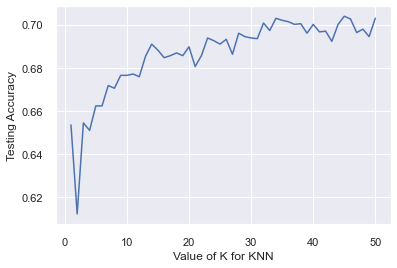

In [95]:
# Import the KNeighborsClassifier class from sklearn
from sklearn.neighbors import KNeighborsClassifier


# Import metrics model to check the accuracy

from sklearn import metrics 

# Runs K=1 through 50 and records testing accuracy

k_range = range(1,51)
scores = {}
scores_list = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    scores[k]=metrics.accuracy_score(y_test,y_pred)
    scores_list.append(metrics.accuracy_score(y_test,y_pred))
    
    
    
    
%matplotlib inline
import matplotlib.pyplot as plt

#plot the relationship between K and the testing accuracy
plt.plot(k_range,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')



Text(0, 0.5, 'Testing Accuracy')

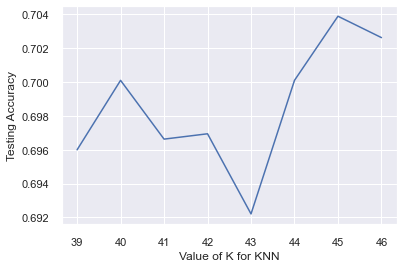

In [97]:
#Runs K=39 through 46 and records testing accuracy, as this was the area with the highest accuracy K for KNN

k_range = range(39,47)
scores = {}
scores_list = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    scores[k]=metrics.accuracy_score(y_test,y_pred)
    scores_list.append(metrics.accuracy_score(y_test,y_pred))
    
    
    
    
%matplotlib inline
import matplotlib.pyplot as plt

#plot the relationship between K and the testing accuracy
plt.plot(k_range,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')


In [70]:
## It appears testing accuracy for values of K is highest when K is 45, so then tried k=42 neighbors for our model

In [98]:
KNNmodel = KNeighborsClassifier(n_neighbors=45)

KNNmodel.fit(X_train, y_train)

# predict probabilities

pred_probKNN = KNNmodel.predict_proba(X_test)

print("Train set score: {:.4f}".format(KNNmodel.score(X_train, y_train)))
print("Test set score: {:.4f}".format(KNNmodel.score(X_test, y_test)))


KNNclasses = KNNmodel.predict(X_test)
print(metrics.classification_report(KNNclasses, y_test))



Train set score: 0.7312
Test set score: 0.7039
              precision    recall  f1-score   support

           0       0.49      0.75      0.60       920
           1       0.87      0.68      0.77      2251

    accuracy                           0.70      3171
   macro avg       0.68      0.72      0.68      3171
weighted avg       0.76      0.70      0.72      3171



0.774855817477622


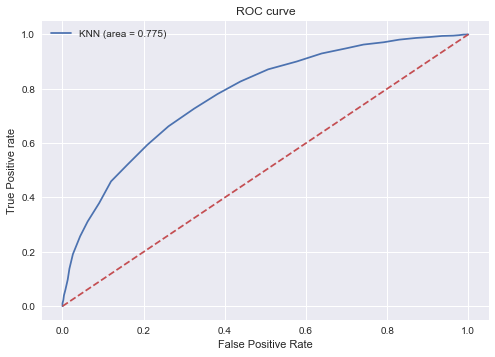

In [99]:
# To determine that our model is great for evaluation, was decided to use ROC-AUC 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score



fpr, tpr, thresh = roc_curve(y_test, pred_probKNN[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# auc score

Knn_auc_score = roc_auc_score(y_test, pred_probKNN[:,1])

print(Knn_auc_score)



# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curve
plt.plot(fpr, tpr, label='KNN (area = %0.3f)' % Knn_auc_score)
plt.plot([0, 1], [0, 1],'r--')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();





### From the above information, it can be seen that with k=45, which is a rather large number of neighbors, our model is able to achieve an AUC-score of 0.774. This may be due to the fact that the dataset has a wide variety of factors and demographics within it, which could account for the large number of k being an alright fit.


# Logistic Regression Classifier

In [139]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_multilabel_classification

# Create param grid 

log=LogisticRegression(random_state = 0)

grid_param = [
    {'penalty' : ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver' : ['liblinear', 'lbfgs'], 'max_iter': [100,500,1000,2500,5000]}
]



# Create grid search object

logmodel = GridSearchCV(log, param_grid =grid_param, cv = 5, verbose=True, n_jobs=-1)

# Fit on data

logmodel.fit(X_train, y_train)


# Printing Best parameters and best score
best_parameters = logmodel.best_params_
print(best_parameters)

best_result = logmodel.best_score_
print(best_result)





Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:   13.9s


{'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.6876902538633727


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   17.9s finished


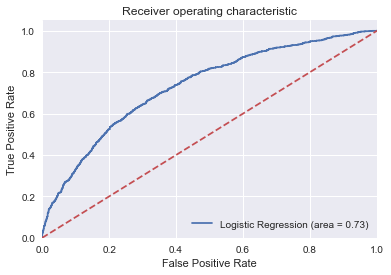

In [140]:
# Finds ROC-AUC curve and plots graph
probs = logmodel.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [141]:
# The ROC-AUC score is 0.73

roc_auc

0.7316341088895428

In [142]:
print('Model accuracy is',logmodel.score(X_test, y_test))

Model accuracy is 0.6789656259854935


In [144]:
# Printing Various Other Scores of Model Effectiveness

classes = logmodel.predict(X_test)

accuracy = metrics.accuracy_score(classes, y_test)
    
balanced_accuracy = metrics.balanced_accuracy_score(classes, y_test)

precision = metrics.precision_score(classes, y_test)
    
average_precision = metrics.average_precision_score(classes, y_test)
    
f1_score = metrics.f1_score(classes, y_test)
    
recall = metrics.recall_score(classes, y_test)

print (" The Logistic Regression has an accuracy of :", accuracy,",\n The Logistic Regression has a balanced accuracy of :", balanced_accuracy,",\n The Logistic Regression has precision :", precision, ",\n The Logistic Regression has an average precision of :", average_precision,",\n The Logistic Regression has an f1 score of :" ,f1_score,",\n The Logistic Regression has a recall of :", recall, ",\n The Logistic Regression has an ROC-AUC of :", roc_auc)




 The Logistic Regression has an accuracy of : 0.6789656259854935 ,
 The Logistic Regression has a balanced accuracy of : 0.676027800281414 ,
 The Logistic Regression has precision : 0.7768969422423556 ,
 The Logistic Regression has an average precision of : 0.7308026901616066 ,
 The Logistic Regression has an f1 score of : 0.7293992557150453 ,
 The Logistic Regression has a recall of : 0.687374749498998 ,
 The Logistic Regression has an ROC-AUC of : 0.7316341088895428


In [78]:
print(metrics.classification_report(classes, y_test))

              precision    recall  f1-score   support

           0       0.56      0.66      0.61      1175
           1       0.78      0.69      0.73      1996

    accuracy                           0.68      3171
   macro avg       0.67      0.68      0.67      3171
weighted avg       0.69      0.68      0.68      3171



### It can be concluded by the above model output for the Logistic Regression model, that KNN apeared to be a better fit based on the AUC of our ROC, with an AUC of 0.774

# Decision Tree Classifier

In [79]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


In [80]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree



#Tuning Paramaters
tuned_parameters = [{'max_depth': [2,3,4,5,6,7,8,9,10,11], 
                     'min_samples_split': [2,4,5,6,7,8]}]


#Decision Tree Classifier Model
tree=DecisionTreeClassifier(random_state=0)


#Looping GridSearchCV, to apply different scoring methods

scores = ['recall','roc_auc','f1','average_precision','accuracy']
for score in scores:
    
    print()
    print(f"Tuning hyperparameters for {score}")
    print()
    
    clf = GridSearchCV(
        tree, tuned_parameters,
        scoring = f'{score}'
    )
    clf.fit(X_train, y_train)
    
    print('Scoring Method Used:',score)
    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print('Best Score:', clf.best_score_)



Tuning hyperparameters for recall

Scoring Method Used: recall
Best parameters set found on development set:

{'max_depth': 3, 'min_samples_split': 2}
Best Score: 0.9226673486198887

Tuning hyperparameters for roc_auc

Scoring Method Used: roc_auc
Best parameters set found on development set:

{'max_depth': 7, 'min_samples_split': 7}
Best Score: 0.7333726316905828

Tuning hyperparameters for f1

Scoring Method Used: f1
Best parameters set found on development set:

{'max_depth': 3, 'min_samples_split': 2}
Best Score: 0.7443293953803651

Tuning hyperparameters for average_precision

Scoring Method Used: average_precision
Best parameters set found on development set:

{'max_depth': 8, 'min_samples_split': 2}
Best Score: 0.759259893335513

Tuning hyperparameters for accuracy

Scoring Method Used: accuracy
Best parameters set found on development set:

{'max_depth': 10, 'min_samples_split': 2}
Best Score: 0.6961010701460365


### It can be seen from the above output, that roc auc scoring and average precision matched in values for best tuning parameters. In addition, since each of these outputs supplies the best parameters based on several scoring methods, I decided to run each and see which had the best score.

## Fitting Tree 1 with parameters Max Depth = 7 and Min Sample Split = 7

In [104]:
# Fitting various tree models with parameters found above for average precision and f1, using the roc_auc_score as a measure of evaluation.

tree1 = DecisionTreeClassifier(max_depth =7, min_samples_split=7, random_state = 0)
tree1.fit(X_train, y_train)


# predict probabilities

pred_probtree1 = tree1.predict_proba(X_test)

print("Train set score: {:.4f}".format(tree1.score(X_train, y_train)))
print("Test set score: {:.4f}".format(tree1.score(X_test, y_test)))


tree1classes = tree1.predict(X_test)
print(metrics.classification_report(tree1classes, y_test))



Train set score: 0.7267
Test set score: 0.6916
              precision    recall  f1-score   support

           0       0.56      0.69      0.62      1137
           1       0.80      0.69      0.74      2034

    accuracy                           0.69      3171
   macro avg       0.68      0.69      0.68      3171
weighted avg       0.71      0.69      0.70      3171



0.7412728767587045


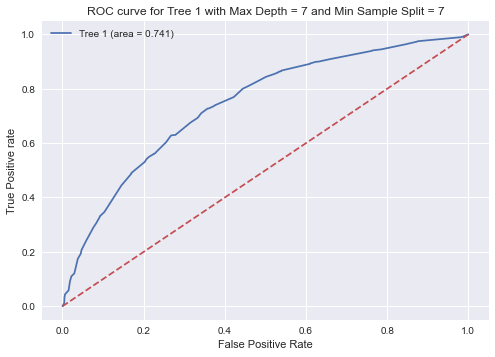

In [106]:
# Graphing the ROC Curve with AUC

fpr, tpr, thresh = roc_curve(y_test, pred_probtree1[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# auc score

tree1_auc_score = roc_auc_score(y_test, pred_probtree1[:,1])

print(tree1_auc_score)


# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curve
plt.plot(fpr, tpr, label='Tree 1 (area = %0.3f)' % tree1_auc_score)
plt.plot([0, 1], [0, 1],'r--')
# title
plt.title('ROC curve for Tree 1 with Max Depth = 7 and Min Sample Split = 7')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

## Fitting Tree 2 with parameters Max Depth = 3 and Min Sample Split = 2

In [83]:
# Fitting various tree models with parameters found above for average precision and f1, using the roc_auc_score as a measure of evaluation.


tree2 = DecisionTreeClassifier(max_depth =3, min_samples_split=2, random_state = 0)
tree2.fit(X_train, y_train)


# predict probabilities

pred_probtree2 = tree2.predict_proba(X_test)

print("Train set score: {:.4f}".format(tree2.score(X_train, y_train)))
print("Test set score: {:.4f}".format(tree2.score(X_test, y_test)))


tree2classes = tree2.predict(X_test)
print(metrics.classification_report(tree2classes, y_test))

Train set score: 0.6323
Test set score: 0.6222
              precision    recall  f1-score   support

           0       0.24      0.73      0.36       455
           1       0.93      0.60      0.73      2716

    accuracy                           0.62      3171
   macro avg       0.58      0.67      0.54      3171
weighted avg       0.83      0.62      0.68      3171



0.6724247651366461


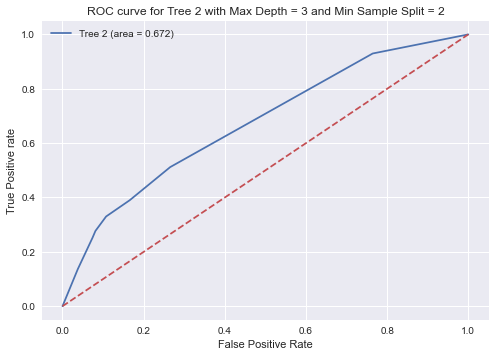

In [84]:
# Graphing the ROC Curve with AUC

fpr, tpr, thresh = roc_curve(y_test, pred_probtree2[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# auc score

tree2_auc_score = roc_auc_score(y_test, pred_probtree2[:,1])

print(tree2_auc_score)



# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curve
plt.plot(fpr, tpr, label='Tree 2 (area = %0.3f)' % tree2_auc_score)
plt.plot([0, 1], [0, 1],'r--')
# title
plt.title('ROC curve for Tree 2 with Max Depth = 3 and Min Sample Split = 2')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();



### Based on the roc_auc_scores above, it can be said that tree 1, which uses a max depth =7 and a minimum split = 7, was the best decision tree, based on this evaluation.

## Kernelized Support Vector Machine 

In [85]:
%matplotlib inline
from sklearn.datasets import make_moons
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions


In [86]:
grid_param = {'C': [0.01,0.1, 1, 10, 100], 
              'gamma': [100,10,1, 0.1, 0.01, 0.001],
              'kernel': ['rbf','linear']} 
  
ksvm = GridSearchCV(SVC(), param_grid=grid_param, refit = True, verbose = 3)
      
ksvm.fit(X_train, y_train)
   
print('Best Parameters:',ksvm.best_params_)    
print('Best:estimator:',ksvm.best_estimator_)
print('Best Score:', ksvm.best_score_)
    
ksvm_predictions = ksvm.predict(X_test)


print("Confusion Matrix:",confusion_matrix(y_test,ksvm_predictions))

print(classification_report(y_test, ksvm_predictions))






Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] C=0.01, gamma=100, kernel=rbf ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....... C=0.01, gamma=100, kernel=rbf, score=0.572, total=  14.3s
[CV] C=0.01, gamma=100, kernel=rbf ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   14.2s remaining:    0.0s


[CV] ....... C=0.01, gamma=100, kernel=rbf, score=0.572, total=  14.3s
[CV] C=0.01, gamma=100, kernel=rbf ...................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   28.5s remaining:    0.0s


[CV] ....... C=0.01, gamma=100, kernel=rbf, score=0.572, total=  13.3s
[CV] C=0.01, gamma=100, kernel=rbf ...................................
[CV] ....... C=0.01, gamma=100, kernel=rbf, score=0.572, total=  12.7s
[CV] C=0.01, gamma=100, kernel=rbf ...................................
[CV] ....... C=0.01, gamma=100, kernel=rbf, score=0.573, total=  13.4s
[CV] C=0.01, gamma=100, kernel=linear ................................
[CV] .... C=0.01, gamma=100, kernel=linear, score=0.696, total=   5.8s
[CV] C=0.01, gamma=100, kernel=linear ................................
[CV] .... C=0.01, gamma=100, kernel=linear, score=0.686, total=   6.0s
[CV] C=0.01, gamma=100, kernel=linear ................................
[CV] .... C=0.01, gamma=100, kernel=linear, score=0.675, total=   5.8s
[CV] C=0.01, gamma=100, kernel=linear ................................
[CV] .... C=0.01, gamma=100, kernel=linear, score=0.693, total=   5.7s
[CV] C=0.01, gamma=100, kernel=linear ................................
[CV] .

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed: 72.6min finished


Best Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Best:estimator: SVC(C=1, gamma=0.1)
Best Score: 0.7492898202130347
Confusion Matrix: [[ 895  510]
 [ 285 1481]]
              precision    recall  f1-score   support

           0       0.76      0.64      0.69      1405
           1       0.74      0.84      0.79      1766

    accuracy                           0.75      3171
   macro avg       0.75      0.74      0.74      3171
weighted avg       0.75      0.75      0.75      3171



In [88]:
# Runs SVC 'Poly' Kernel

grid_param2 = {'C': [0.01,0.1, 1, 10, 1000], 
              'max_iter': [1000,100,10],'kernel': ['poly']} 



  
polysvc = GridSearchCV(SVC(random_state=0), param_grid=grid_param2, refit = True, verbose = 3)
      
polysvc.fit(X_train, y_train)
   
print('Best Parameters:',polysvc.best_params_)    
print('Best:estimator:',polysvc.best_estimator_)
print('Best Score:', polysvc.best_score_)
    
polysvc_predictions = polysvc.predict(X_test)


print("Confusion Matrix:",confusion_matrix(y_test,polysvc_predictions))

print(classification_report(y_test, polysvc_predictions))












Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] C=0.01, kernel=poly, max_iter=1000 ..............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV] .. C=0.01, kernel=poly, max_iter=1000, score=0.652, total=   1.7s
[CV] C=0.01, kernel=poly, max_iter=1000 ..............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s
C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV] .. C=0.01, kernel=poly, max_iter=1000, score=0.621, total=   1.7s
[CV] C=0.01, kernel=poly, max_iter=1000 ..............................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.3s remaining:    0.0s
C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV] .. C=0.01, kernel=poly, max_iter=1000, score=0.620, total=   1.6s
[CV] C=0.01, kernel=poly, max_iter=1000 ..............................


C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV] .. C=0.01, kernel=poly, max_iter=1000, score=0.642, total=   1.7s
[CV] C=0.01, kernel=poly, max_iter=1000 ..............................


C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV] .. C=0.01, kernel=poly, max_iter=1000, score=0.635, total=   1.7s
[CV] C=0.01, kernel=poly, max_iter=100 ...............................
[CV] ... C=0.01, kernel=poly, max_iter=100, score=0.628, total=   0.2s
[CV] C=0.01, kernel=poly, max_iter=100 ...............................


C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV] ... C=0.01, kernel=poly, max_iter=100, score=0.613, total=   0.2s
[CV] C=0.01, kernel=poly, max_iter=100 ...............................
[CV] ... C=0.01, kernel=poly, max_iter=100, score=0.621, total=   0.2s
[CV] C=0.01, kernel=poly, max_iter=100 ...............................


C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV] ... C=0.01, kernel=poly, max_iter=100, score=0.621, total=   0.2s
[CV] C=0.01, kernel=poly, max_iter=100 ...............................
[CV] ... C=0.01, kernel=poly, max_iter=100, score=0.596, total=   0.2s
[CV] C=0.01, kernel=poly, max_iter=10 ................................


C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with S

[CV] .... C=0.01, kernel=poly, max_iter=10, score=0.554, total=   0.0s
[CV] C=0.01, kernel=poly, max_iter=10 ................................
[CV] .... C=0.01, kernel=poly, max_iter=10, score=0.503, total=   0.0s
[CV] C=0.01, kernel=poly, max_iter=10 ................................
[CV] .... C=0.01, kernel=poly, max_iter=10, score=0.481, total=   0.0s
[CV] C=0.01, kernel=poly, max_iter=10 ................................
[CV] .... C=0.01, kernel=poly, max_iter=10, score=0.583, total=   0.0s
[CV] C=0.01, kernel=poly, max_iter=10 ................................
[CV] .... C=0.01, kernel=poly, max_iter=10, score=0.482, total=   0.0s
[CV] C=0.1, kernel=poly, max_iter=1000 ...............................


C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV] ... C=0.1, kernel=poly, max_iter=1000, score=0.648, total=   1.6s
[CV] C=0.1, kernel=poly, max_iter=1000 ...............................


C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV] ... C=0.1, kernel=poly, max_iter=1000, score=0.644, total=   1.7s
[CV] C=0.1, kernel=poly, max_iter=1000 ...............................


C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV] ... C=0.1, kernel=poly, max_iter=1000, score=0.656, total=   1.7s
[CV] C=0.1, kernel=poly, max_iter=1000 ...............................


C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV] ... C=0.1, kernel=poly, max_iter=1000, score=0.641, total=   1.7s
[CV] C=0.1, kernel=poly, max_iter=1000 ...............................


C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV] ... C=0.1, kernel=poly, max_iter=1000, score=0.619, total=   1.7s
[CV] C=0.1, kernel=poly, max_iter=100 ................................
[CV] .... C=0.1, kernel=poly, max_iter=100, score=0.613, total=   0.2s
[CV] C=0.1, kernel=poly, max_iter=100 ................................


C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV] .... C=0.1, kernel=poly, max_iter=100, score=0.611, total=   0.2s
[CV] C=0.1, kernel=poly, max_iter=100 ................................
[CV] .... C=0.1, kernel=poly, max_iter=100, score=0.619, total=   0.2s
[CV] C=0.1, kernel=poly, max_iter=100 ................................


C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV] .... C=0.1, kernel=poly, max_iter=100, score=0.595, total=   0.2s
[CV] C=0.1, kernel=poly, max_iter=100 ................................
[CV] .... C=0.1, kernel=poly, max_iter=100, score=0.605, total=   0.2s
[CV] C=0.1, kernel=poly, max_iter=10 .................................


C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with 

[CV] ..... C=0.1, kernel=poly, max_iter=10, score=0.554, total=   0.0s
[CV] C=0.1, kernel=poly, max_iter=10 .................................
[CV] ..... C=0.1, kernel=poly, max_iter=10, score=0.530, total=   0.0s
[CV] C=0.1, kernel=poly, max_iter=10 .................................
[CV] ..... C=0.1, kernel=poly, max_iter=10, score=0.481, total=   0.0s
[CV] C=0.1, kernel=poly, max_iter=10 .................................
[CV] ..... C=0.1, kernel=poly, max_iter=10, score=0.583, total=   0.0s
[CV] C=0.1, kernel=poly, max_iter=10 .................................
[CV] ..... C=0.1, kernel=poly, max_iter=10, score=0.488, total=   0.0s
[CV] C=1, kernel=poly, max_iter=1000 .................................


C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV] ..... C=1, kernel=poly, max_iter=1000, score=0.689, total=   1.6s
[CV] C=1, kernel=poly, max_iter=1000 .................................


C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV] ..... C=1, kernel=poly, max_iter=1000, score=0.667, total=   1.7s
[CV] C=1, kernel=poly, max_iter=1000 .................................


C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV] ..... C=1, kernel=poly, max_iter=1000, score=0.674, total=   1.8s
[CV] C=1, kernel=poly, max_iter=1000 .................................


C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV] ..... C=1, kernel=poly, max_iter=1000, score=0.666, total=   1.7s
[CV] C=1, kernel=poly, max_iter=1000 .................................


C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV] ..... C=1, kernel=poly, max_iter=1000, score=0.655, total=   1.6s
[CV] C=1, kernel=poly, max_iter=100 ..................................
[CV] ...... C=1, kernel=poly, max_iter=100, score=0.593, total=   0.2s
[CV] C=1, kernel=poly, max_iter=100 ..................................


C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV] ...... C=1, kernel=poly, max_iter=100, score=0.592, total=   0.2s
[CV] C=1, kernel=poly, max_iter=100 ..................................
[CV] ...... C=1, kernel=poly, max_iter=100, score=0.589, total=   0.2s
[CV] C=1, kernel=poly, max_iter=100 ..................................


C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV] ...... C=1, kernel=poly, max_iter=100, score=0.601, total=   0.2s
[CV] C=1, kernel=poly, max_iter=100 ..................................
[CV] ...... C=1, kernel=poly, max_iter=100, score=0.584, total=   0.2s
[CV] C=1, kernel=poly, max_iter=10 ...................................


C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with 

[CV] ....... C=1, kernel=poly, max_iter=10, score=0.578, total=   0.0s
[CV] C=1, kernel=poly, max_iter=10 ...................................
[CV] ....... C=1, kernel=poly, max_iter=10, score=0.578, total=   0.0s
[CV] C=1, kernel=poly, max_iter=10 ...................................
[CV] ....... C=1, kernel=poly, max_iter=10, score=0.472, total=   0.0s
[CV] C=1, kernel=poly, max_iter=10 ...................................
[CV] ....... C=1, kernel=poly, max_iter=10, score=0.553, total=   0.0s
[CV] C=1, kernel=poly, max_iter=10 ...................................
[CV] ....... C=1, kernel=poly, max_iter=10, score=0.581, total=   0.0s
[CV] C=10, kernel=poly, max_iter=1000 ................................


C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV] .... C=10, kernel=poly, max_iter=1000, score=0.657, total=   1.5s
[CV] C=10, kernel=poly, max_iter=1000 ................................


C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV] .... C=10, kernel=poly, max_iter=1000, score=0.641, total=   1.6s
[CV] C=10, kernel=poly, max_iter=1000 ................................


C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV] .... C=10, kernel=poly, max_iter=1000, score=0.654, total=   1.6s
[CV] C=10, kernel=poly, max_iter=1000 ................................


C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV] .... C=10, kernel=poly, max_iter=1000, score=0.674, total=   1.6s
[CV] C=10, kernel=poly, max_iter=1000 ................................


C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV] .... C=10, kernel=poly, max_iter=1000, score=0.613, total=   1.5s
[CV] C=10, kernel=poly, max_iter=100 .................................
[CV] ..... C=10, kernel=poly, max_iter=100, score=0.554, total=   0.2s
[CV] C=10, kernel=poly, max_iter=100 .................................


C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV] ..... C=10, kernel=poly, max_iter=100, score=0.548, total=   0.2s
[CV] C=10, kernel=poly, max_iter=100 .................................
[CV] ..... C=10, kernel=poly, max_iter=100, score=0.600, total=   0.2s
[CV] C=10, kernel=poly, max_iter=100 .................................


C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV] ..... C=10, kernel=poly, max_iter=100, score=0.593, total=   0.2s
[CV] C=10, kernel=poly, max_iter=100 .................................


C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with 

[CV] ..... C=10, kernel=poly, max_iter=100, score=0.546, total=   0.2s
[CV] C=10, kernel=poly, max_iter=10 ..................................
[CV] ...... C=10, kernel=poly, max_iter=10, score=0.472, total=   0.0s
[CV] C=10, kernel=poly, max_iter=10 ..................................
[CV] ...... C=10, kernel=poly, max_iter=10, score=0.462, total=   0.0s
[CV] C=10, kernel=poly, max_iter=10 ..................................
[CV] ...... C=10, kernel=poly, max_iter=10, score=0.501, total=   0.0s
[CV] C=10, kernel=poly, max_iter=10 ..................................
[CV] ...... C=10, kernel=poly, max_iter=10, score=0.542, total=   0.0s
[CV] C=10, kernel=poly, max_iter=10 ..................................
[CV] ...... C=10, kernel=poly, max_iter=10, score=0.507, total=   0.0s
[CV] C=1000, kernel=poly, max_iter=1000 ..............................


C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV] .. C=1000, kernel=poly, max_iter=1000, score=0.669, total=   1.6s
[CV] C=1000, kernel=poly, max_iter=1000 ..............................


C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV] .. C=1000, kernel=poly, max_iter=1000, score=0.652, total=   1.5s
[CV] C=1000, kernel=poly, max_iter=1000 ..............................


C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV] .. C=1000, kernel=poly, max_iter=1000, score=0.654, total=   1.7s
[CV] C=1000, kernel=poly, max_iter=1000 ..............................


C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV] .. C=1000, kernel=poly, max_iter=1000, score=0.660, total=   1.5s
[CV] C=1000, kernel=poly, max_iter=1000 ..............................


C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV] .. C=1000, kernel=poly, max_iter=1000, score=0.607, total=   1.5s
[CV] C=1000, kernel=poly, max_iter=100 ...............................
[CV] ... C=1000, kernel=poly, max_iter=100, score=0.581, total=   0.2s
[CV] C=1000, kernel=poly, max_iter=100 ...............................


C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV] ... C=1000, kernel=poly, max_iter=100, score=0.548, total=   0.2s
[CV] C=1000, kernel=poly, max_iter=100 ...............................
[CV] ... C=1000, kernel=poly, max_iter=100, score=0.600, total=   0.2s
[CV] C=1000, kernel=poly, max_iter=100 ...............................


C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[CV] ... C=1000, kernel=poly, max_iter=100, score=0.546, total=   0.2s
[CV] C=1000, kernel=poly, max_iter=100 ...............................
[CV] ... C=1000, kernel=poly, max_iter=100, score=0.546, total=   0.2s
[CV] C=1000, kernel=poly, max_iter=10 ................................


C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with 

[CV] .... C=1000, kernel=poly, max_iter=10, score=0.472, total=   0.0s
[CV] C=1000, kernel=poly, max_iter=10 ................................
[CV] .... C=1000, kernel=poly, max_iter=10, score=0.462, total=   0.0s
[CV] C=1000, kernel=poly, max_iter=10 ................................
[CV] .... C=1000, kernel=poly, max_iter=10, score=0.501, total=   0.0s
[CV] C=1000, kernel=poly, max_iter=10 ................................
[CV] .... C=1000, kernel=poly, max_iter=10, score=0.542, total=   0.0s
[CV] C=1000, kernel=poly, max_iter=10 ................................
[CV] .... C=1000, kernel=poly, max_iter=10, score=0.507, total=   0.0s


C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


Best Parameters: {'C': 1, 'kernel': 'poly', 'max_iter': 1000}
Best:estimator: SVC(C=1, kernel='poly', max_iter=1000, random_state=0)
Best Score: 0.6701334933551706
Confusion Matrix: [[ 645  760]
 [ 376 1390]]
              precision    recall  f1-score   support

           0       0.63      0.46      0.53      1405
           1       0.65      0.79      0.71      1766

    accuracy                           0.64      3171
   macro avg       0.64      0.62      0.62      3171
weighted avg       0.64      0.64      0.63      3171



In [115]:
# Fits Best Parameters found for Kernelized Support Vector Machine


clf = SVC(kernel='rbf', gamma=0.1, C=1,probability=True)

clf.fit(X_train, y_train)


# predict probabilities

pred_probclf = clf.predict_proba(X_test)

print("Train set score: {:.4f}".format(clf.score(X_train, y_train)))
print("Test set score: {:.4f}".format(clf.score(X_test, y_test)))


clfclasses = clf.predict(X_test)
print(metrics.classification_report(clfclasses, y_test))



Train set score: 0.8705
Test set score: 0.7493
              precision    recall  f1-score   support

           0       0.64      0.76      0.69      1180
           1       0.84      0.74      0.79      1991

    accuracy                           0.75      3171
   macro avg       0.74      0.75      0.74      3171
weighted avg       0.76      0.75      0.75      3171



0.8191636809163196


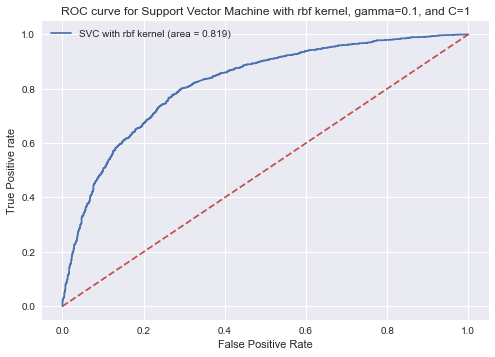

In [116]:
# Graphing the ROC Curve with AUC

fpr, tpr, thresh = roc_curve(y_test, pred_probclf[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# auc score

clf_auc_score = roc_auc_score(y_test, pred_probclf[:,1])

print(clf_auc_score)



# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curve
plt.plot(fpr, tpr, label='SVC with rbf kernel (area = %0.3f)' % clf_auc_score)
plt.plot([0, 1], [0, 1],'r--')
# title
plt.title('ROC curve for Support Vector Machine with rbf kernel, gamma=0.1, and C=1')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();


In [90]:
# Runs Linear SVC
from sklearn.svm import LinearSVC


grid_param = {'penalty':['l1','l2'],'C': [0.01,0.1, 1, 10], 
              'max_iter': [1000,100,10]}



lsvc= GridSearchCV(LinearSVC(random_state=0), param_grid=grid_param, refit = True, verbose = 3)

lsvc.fit(X_train, y_train)
   
print('Best Parameters:',lsvc.best_params_)    
print('Best:estimator:',lsvc.best_estimator_)
print('Best Score:', lsvc.best_score_)
    
lsvc_predictions = lsvc.predict(X_test)


print("Confusion Matrix:",confusion_matrix(y_test,lsvc_predictions))

print(classification_report(y_test, lsvc_predictions))




Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] C=0.01, max_iter=1000, penalty=l1 ...............................
[CV] ..... C=0.01, max_iter=1000, penalty=l1, score=nan, total=   0.0s
[CV] C=0.01, max_iter=1000, penalty=l1 ...............................
[CV] ..... C=0.01, max_iter=1000, penalty=l1, score=nan, total=   0.0s
[CV] C=0.01, max_iter=1000, penalty=l1 ...............................
[CV] ..... C=0.01, max_iter=1000, penalty=l1, score=nan, total=   0.0s
[CV] C=0.01, max_iter=1000, penalty=l1 ...............................
[CV] ..... C=0.01, max_iter=1000, penalty=l1, score=nan, total=   0.0s
[CV] C=0.01, max_iter=1000, penalty=l1 ...............................
[CV] ..... C=0.01, max_iter=1000, penalty=l1, score=nan, total=   0.0s
[CV] C=0.01, max_iter=1000, penalty=l2 ...............................
[CV] ... C=0.01, max_iter=1000, penalty=l2, score=0.690, total=   0.0s
[CV] C=0.01, max_iter=1000, penalty=l2 ...............................
[CV] ... C=0.01

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\svm\_classes.py", line 233, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\svm\_base.py", line 965, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(multi_class, penalty, loss, dual)
  File "C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\svm\_base.py", line 821,

[CV] ...... C=0.01, max_iter=100, penalty=l1, score=nan, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l1 ................................
[CV] ...... C=0.01, max_iter=100, penalty=l1, score=nan, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l1 ................................
[CV] ...... C=0.01, max_iter=100, penalty=l1, score=nan, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l1 ................................
[CV] ...... C=0.01, max_iter=100, penalty=l1, score=nan, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l1 ................................
[CV] ...... C=0.01, max_iter=100, penalty=l1, score=nan, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l2 ................................
[CV] .... C=0.01, max_iter=100, penalty=l2, score=0.690, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l2 ................................
[CV] .... C=0.01, max_iter=100, penalty=l2, score=0.689, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l2 ................................
[CV] .

C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\svm\_classes.py", line 233, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\svm\_base.py", line 965, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(multi_class, penalty, loss, dual)
  File "C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\svm\_base.py", line 821, in _get_liblinear_solver_type
    raise ValueError('Unsupported set of arguments


[CV] .... C=0.01, max_iter=100, penalty=l2, score=0.683, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l2 ................................
[CV] .... C=0.01, max_iter=100, penalty=l2, score=0.687, total=   0.0s
[CV] C=0.01, max_iter=10, penalty=l1 .................................
[CV] ....... C=0.01, max_iter=10, penalty=l1, score=nan, total=   0.0s
[CV] C=0.01, max_iter=10, penalty=l1 .................................
[CV] ....... C=0.01, max_iter=10, penalty=l1, score=nan, total=   0.0s
[CV] C=0.01, max_iter=10, penalty=l1 .................................
[CV] ....... C=0.01, max_iter=10, penalty=l1, score=nan, total=   0.0s
[CV] C=0.01, max_iter=10, penalty=l1 .................................
[CV] ....... C=0.01, max_iter=10, penalty=l1, score=nan, total=   0.0s
[CV] C=0.01, max_iter=10, penalty=l1 .................................
[CV] ....... C=0.01, max_iter=10, penalty=l1, score=nan, total=   0.0s
[CV] C=0.01, max_iter=10, penalty=l2 .................................
[CV] 

C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\svm\_classes.py", line 233, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\svm\_base.py", line 965, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(multi_class, penalty, loss, dual)
  File "C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\svm\_base.py", line 821, in _get_liblinear_solver_type
    raise ValueError('Unsupported set of arguments


[CV] ...... C=0.1, max_iter=1000, penalty=l1, score=nan, total=   0.0s
[CV] C=0.1, max_iter=1000, penalty=l1 ................................
[CV] ...... C=0.1, max_iter=1000, penalty=l1, score=nan, total=   0.0s
[CV] C=0.1, max_iter=1000, penalty=l1 ................................
[CV] ...... C=0.1, max_iter=1000, penalty=l1, score=nan, total=   0.0s
[CV] C=0.1, max_iter=1000, penalty=l2 ................................
[CV] .... C=0.1, max_iter=1000, penalty=l2, score=0.694, total=   0.1s
[CV] C=0.1, max_iter=1000, penalty=l2 ................................
[CV] .... C=0.1, max_iter=1000, penalty=l2, score=0.684, total=   0.0s
[CV] C=0.1, max_iter=1000, penalty=l2 ................................
[CV] .... C=0.1, max_iter=1000, penalty=l2, score=0.680, total=   0.1s
[CV] C=0.1, max_iter=1000, penalty=l2 ................................


C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\svm\_classes.py", line 233, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\svm\_base.py", line 965, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(multi_class, penalty, loss, dual)
  File "C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\svm\_base.py", line 821, in _get_liblinear_solver_type
    raise ValueError('Unsupported set of arguments

[CV] .... C=0.1, max_iter=1000, penalty=l2, score=0.684, total=   0.1s
[CV] C=0.1, max_iter=1000, penalty=l2 ................................
[CV] .... C=0.1, max_iter=1000, penalty=l2, score=0.685, total=   0.0s
[CV] C=0.1, max_iter=100, penalty=l1 .................................
[CV] ....... C=0.1, max_iter=100, penalty=l1, score=nan, total=   0.0s
[CV] C=0.1, max_iter=100, penalty=l1 .................................
[CV] ....... C=0.1, max_iter=100, penalty=l1, score=nan, total=   0.0s
[CV] C=0.1, max_iter=100, penalty=l1 .................................
[CV] ....... C=0.1, max_iter=100, penalty=l1, score=nan, total=   0.0s
[CV] C=0.1, max_iter=100, penalty=l1 .................................
[CV] ....... C=0.1, max_iter=100, penalty=l1, score=nan, total=   0.0s
[CV] C=0.1, max_iter=100, penalty=l1 .................................
[CV] ....... C=0.1, max_iter=100, penalty=l1, score=nan, total=   0.0s
[CV] C=0.1, max_iter=100, penalty=l2 .................................
[CV] .

C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\svm\_classes.py", line 233, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\svm\_base.py", line 965, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(multi_class, penalty, loss, dual)
  File "C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\svm\_base.py", line 821, in _get_liblinear_solver_type
    raise ValueError('Unsupported set of arguments

[CV] ..... C=0.1, max_iter=100, penalty=l2, score=0.680, total=   0.1s
[CV] C=0.1, max_iter=100, penalty=l2 .................................
[CV] ..... C=0.1, max_iter=100, penalty=l2, score=0.684, total=   0.1s
[CV] C=0.1, max_iter=100, penalty=l2 .................................
[CV] ..... C=0.1, max_iter=100, penalty=l2, score=0.685, total=   0.1s
[CV] C=0.1, max_iter=10, penalty=l1 ..................................
[CV] ........ C=0.1, max_iter=10, penalty=l1, score=nan, total=   0.0s
[CV] C=0.1, max_iter=10, penalty=l1 ..................................
[CV] ........ C=0.1, max_iter=10, penalty=l1, score=nan, total=   0.0s
[CV] C=0.1, max_iter=10, penalty=l1 ..................................
[CV] ........ C=0.1, max_iter=10, penalty=l1, score=nan, total=   0.0s
[CV] C=0.1, max_iter=10, penalty=l1 ..................................
[CV] ........ C=0.1, max_iter=10, penalty=l1, score=nan, total=   0.0s
[CV] C=0.1, max_iter=10, penalty=l1 ..................................
[CV] .

C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\svm\_classes.py", line 233, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\svm\_base.py", line 965, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(multi_class, penalty, loss, dual)
  File "C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\svm\_base.py", line 821, in _get_liblinear_solver_type
    raise ValueError('Unsupported set of arguments


[CV] ........ C=1, max_iter=1000, penalty=l1, score=nan, total=   0.0s
[CV] C=1, max_iter=1000, penalty=l1 ..................................
[CV] ........ C=1, max_iter=1000, penalty=l1, score=nan, total=   0.0s
[CV] C=1, max_iter=1000, penalty=l1 ..................................
[CV] ........ C=1, max_iter=1000, penalty=l1, score=nan, total=   0.0s
[CV] C=1, max_iter=1000, penalty=l1 ..................................
[CV] ........ C=1, max_iter=1000, penalty=l1, score=nan, total=   0.0s
[CV] C=1, max_iter=1000, penalty=l2 ..................................


C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\svm\_classes.py", line 233, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\svm\_base.py", line 965, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(multi_class, penalty, loss, dual)
  File "C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\svm\_base.py", line 821, in _get_liblinear_solver_type
    raise ValueError('Unsupported set of arguments

[CV] ...... C=1, max_iter=1000, penalty=l2, score=0.692, total=   0.3s
[CV] C=1, max_iter=1000, penalty=l2 ..................................
[CV] ...... C=1, max_iter=1000, penalty=l2, score=0.683, total=   0.3s
[CV] C=1, max_iter=1000, penalty=l2 ..................................
[CV] ...... C=1, max_iter=1000, penalty=l2, score=0.679, total=   0.5s
[CV] C=1, max_iter=1000, penalty=l2 ..................................
[CV] ...... C=1, max_iter=1000, penalty=l2, score=0.686, total=   0.4s
[CV] C=1, max_iter=1000, penalty=l2 ..................................
[CV] ...... C=1, max_iter=1000, penalty=l2, score=0.682, total=   0.4s
[CV] C=1, max_iter=100, penalty=l1 ...................................
[CV] ......... C=1, max_iter=100, penalty=l1, score=nan, total=   0.0s
[CV] C=1, max_iter=100, penalty=l1 ...................................
[CV] ......... C=1, max_iter=100, penalty=l1, score=nan, total=   0.0s
[CV] C=1, max_iter=100, penalty=l1 ...................................
[CV] .

C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\svm\_classes.py", line 233, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\svm\_base.py", line 965, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(multi_class, penalty, loss, dual)
  File "C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\svm\_base.py", line 821, in _get_liblinear_solver_type
    raise ValueError('Unsupported set of arguments

[CV] ....... C=1, max_iter=100, penalty=l2, score=0.671, total=   0.1s
[CV] C=1, max_iter=100, penalty=l2 ...................................
[CV] ....... C=1, max_iter=100, penalty=l2, score=0.689, total=   0.1s
[CV] C=1, max_iter=100, penalty=l2 ...................................
[CV] ....... C=1, max_iter=100, penalty=l2, score=0.677, total=   0.1s
[CV] C=1, max_iter=10, penalty=l1 ....................................
[CV] .......... C=1, max_iter=10, penalty=l1, score=nan, total=   0.0s
[CV] C=1, max_iter=10, penalty=l1 ....................................
[CV] .......... C=1, max_iter=10, penalty=l1, score=nan, total=   0.0s
[CV] C=1, max_iter=10, penalty=l1 ....................................
[CV] .......... C=1, max_iter=10, penalty=l1, score=nan, total=   0.0s
[CV] C=1, max_iter=10, penalty=l1 ....................................
[CV] .......... C=1, max_iter=10, penalty=l1, score=nan, total=   0.0s
[CV] C=1, max_iter=10, penalty=l1 ....................................


C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\svm\_classes.py", line 233, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\svm\_base.py", line 965, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(multi_class, penalty, loss, dual)
  File "C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\svm\_base.py", line 821, in _get_liblinear_solver_type
    raise ValueError('Unsupported set of arguments

[CV] .......... C=1, max_iter=10, penalty=l1, score=nan, total=   0.0s
[CV] C=1, max_iter=10, penalty=l2 ....................................
[CV] ........ C=1, max_iter=10, penalty=l2, score=0.595, total=   0.0s
[CV] C=1, max_iter=10, penalty=l2 ....................................
[CV] ........ C=1, max_iter=10, penalty=l2, score=0.599, total=   0.0s
[CV] C=1, max_iter=10, penalty=l2 ....................................
[CV] ........ C=1, max_iter=10, penalty=l2, score=0.627, total=   0.0s
[CV] C=1, max_iter=10, penalty=l2 ....................................
[CV] ........ C=1, max_iter=10, penalty=l2, score=0.613, total=   0.0s
[CV] C=1, max_iter=10, penalty=l2 ....................................
[CV] ........ C=1, max_iter=10, penalty=l2, score=0.636, total=   0.0s
[CV] C=10, max_iter=1000, penalty=l1 .................................
[CV] ....... C=10, max_iter=1000, penalty=l1, score=nan, total=   0.0s
[CV] C=10, max_iter=1000, penalty=l1 .................................
[CV] .

C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ..... C=10, max_iter=1000, penalty=l2, score=0.695, total=   0.6s
[CV] C=10, max_iter=1000, penalty=l2 .................................


C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ..... C=10, max_iter=1000, penalty=l2, score=0.679, total=   0.5s
[CV] C=10, max_iter=1000, penalty=l2 .................................


C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ..... C=10, max_iter=1000, penalty=l2, score=0.675, total=   0.5s
[CV] C=10, max_iter=1000, penalty=l2 .................................


C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ..... C=10, max_iter=1000, penalty=l2, score=0.688, total=   0.6s
[CV] C=10, max_iter=1000, penalty=l2 .................................


C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\svm\_classes.py", line 233, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\svm\_base.py", line 965, in _fit_liblinear
    solver_type = _get_liblinea

[CV] ..... C=10, max_iter=1000, penalty=l2, score=0.691, total=   0.5s
[CV] C=10, max_iter=100, penalty=l1 ..................................
[CV] ........ C=10, max_iter=100, penalty=l1, score=nan, total=   0.0s
[CV] C=10, max_iter=100, penalty=l1 ..................................
[CV] ........ C=10, max_iter=100, penalty=l1, score=nan, total=   0.0s
[CV] C=10, max_iter=100, penalty=l1 ..................................
[CV] ........ C=10, max_iter=100, penalty=l1, score=nan, total=   0.0s
[CV] C=10, max_iter=100, penalty=l1 ..................................
[CV] ........ C=10, max_iter=100, penalty=l1, score=nan, total=   0.0s
[CV] C=10, max_iter=100, penalty=l1 ..................................
[CV] ........ C=10, max_iter=100, penalty=l1, score=nan, total=   0.0s
[CV] C=10, max_iter=100, penalty=l2 ..................................
[CV] ...... C=10, max_iter=100, penalty=l2, score=0.600, total=   0.1s
[CV] C=10, max_iter=100, penalty=l2 ..................................
[CV] .

C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ...... C=10, max_iter=100, penalty=l2, score=0.556, total=   0.1s
[CV] C=10, max_iter=100, penalty=l2 ..................................
[CV] ...... C=10, max_iter=100, penalty=l2, score=0.587, total=   0.1s
[CV] C=10, max_iter=10, penalty=l1 ...................................
[CV] ......... C=10, max_iter=10, penalty=l1, score=nan, total=   0.0s
[CV] C=10, max_iter=10, penalty=l1 ...................................
[CV] ......... C=10, max_iter=10, penalty=l1, score=nan, total=   0.0s
[CV] C=10, max_iter=10, penalty=l1 ...................................
[CV] ......... C=10, max_iter=10, penalty=l1, score=nan, total=   0.0s
[CV] C=10, max_iter=10, penalty=l1 ...................................
[CV] ......... C=10, max_iter=10, penalty=l1, score=nan, total=   0.0s
[CV] C=10, max_iter=10, penalty=l1 ...................................
[CV] ......... C=10, max_iter=10, penalty=l1, score=nan, total=   0.0s
[CV] C=10, max_iter=10, penalty=l2 ...................................
[CV] .

C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\svm\_classes.py", line 233, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\svm\_base.py", line 965, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(multi_class, penalty, loss, dual)
  File "C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\svm\_base.py", line 821, in _get_liblinear_solver_type
    raise ValueError('Unsupported set of arguments

[CV] ....... C=10, max_iter=10, penalty=l2, score=0.613, total=   0.0s
[CV] C=10, max_iter=10, penalty=l2 ...................................
[CV] ....... C=10, max_iter=10, penalty=l2, score=0.604, total=   0.0s
[CV] C=10, max_iter=10, penalty=l2 ...................................
[CV] ....... C=10, max_iter=10, penalty=l2, score=0.622, total=   0.0s
[CV] C=1000, max_iter=1000, penalty=l1 ...............................
[CV] ..... C=1000, max_iter=1000, penalty=l1, score=nan, total=   0.0s
[CV] C=1000, max_iter=1000, penalty=l1 ...............................
[CV] ..... C=1000, max_iter=1000, penalty=l1, score=nan, total=   0.0s
[CV] C=1000, max_iter=1000, penalty=l1 ...............................
[CV] ..... C=1000, max_iter=1000, penalty=l1, score=nan, total=   0.0s
[CV] C=1000, max_iter=1000, penalty=l1 ...............................
[CV] ..... C=1000, max_iter=1000, penalty=l1, score=nan, total=   0.0s
[CV] C=1000, max_iter=1000, penalty=l1 ...............................
[CV] .

C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\svm\_classes.py", line 233, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\svm\_base.py", line 965, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(multi_class, penalty, loss, dual)
  File "C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\svm\_base.py", line 821, in _get_liblinear_solver_type
    raise ValueError('Unsupported set of arguments

[CV] ... C=1000, max_iter=1000, penalty=l2, score=0.538, total=   0.5s
[CV] C=1000, max_iter=1000, penalty=l2 ...............................


C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ... C=1000, max_iter=1000, penalty=l2, score=0.640, total=   0.5s
[CV] C=1000, max_iter=1000, penalty=l2 ...............................


C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ... C=1000, max_iter=1000, penalty=l2, score=0.556, total=   0.5s
[CV] C=1000, max_iter=1000, penalty=l2 ...............................


C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ... C=1000, max_iter=1000, penalty=l2, score=0.633, total=   0.5s
[CV] C=1000, max_iter=1000, penalty=l2 ...............................


C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\svm\_classes.py", line 233, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\svm\_base.py", line 965, in _fit_liblinear
    solver_type = _get_liblinea

[CV] ... C=1000, max_iter=1000, penalty=l2, score=0.596, total=   0.5s
[CV] C=1000, max_iter=100, penalty=l1 ................................
[CV] ...... C=1000, max_iter=100, penalty=l1, score=nan, total=   0.0s
[CV] C=1000, max_iter=100, penalty=l1 ................................
[CV] ...... C=1000, max_iter=100, penalty=l1, score=nan, total=   0.0s
[CV] C=1000, max_iter=100, penalty=l1 ................................
[CV] ...... C=1000, max_iter=100, penalty=l1, score=nan, total=   0.0s
[CV] C=1000, max_iter=100, penalty=l1 ................................
[CV] ...... C=1000, max_iter=100, penalty=l1, score=nan, total=   0.0s
[CV] C=1000, max_iter=100, penalty=l1 ................................
[CV] ...... C=1000, max_iter=100, penalty=l1, score=nan, total=   0.0s
[CV] C=1000, max_iter=100, penalty=l2 ................................
[CV] .... C=1000, max_iter=100, penalty=l2, score=0.549, total=   0.1s
[CV] C=1000, max_iter=100, penalty=l2 ................................
[CV] .

C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\12108\anaconda3\envs\BUAN_6341\lib\

[CV] .... C=1000, max_iter=100, penalty=l2, score=0.565, total=   0.1s
[CV] C=1000, max_iter=100, penalty=l2 ................................
[CV] .... C=1000, max_iter=100, penalty=l2, score=0.599, total=   0.1s
[CV] C=1000, max_iter=100, penalty=l2 ................................
[CV] .... C=1000, max_iter=100, penalty=l2, score=0.567, total=   0.1s
[CV] C=1000, max_iter=10, penalty=l1 .................................
[CV] ....... C=1000, max_iter=10, penalty=l1, score=nan, total=   0.0s
[CV] C=1000, max_iter=10, penalty=l1 .................................
[CV] ....... C=1000, max_iter=10, penalty=l1, score=nan, total=   0.0s
[CV] C=1000, max_iter=10, penalty=l1 .................................
[CV] ....... C=1000, max_iter=10, penalty=l1, score=nan, total=   0.0s
[CV] C=1000, max_iter=10, penalty=l1 .................................
[CV] ....... C=1000, max_iter=10, penalty=l1, score=nan, total=   0.0s
[CV] C=1000, max_iter=10, penalty=l1 .................................
[CV] .

C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\svm\_classes.py", line 233, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\svm\_base.py", line 965, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(multi_class, penalty, loss, dual)
  File "C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\svm\_base.py", line 821, in _get_liblinear_solver_type
    raise ValueError('Unsupported set of arguments

In [148]:
# Fits Best Parameters found for Kernelized Support Vector Machine


lsvc_best = LinearSVC(C=0.1, max_iter=10, penalty='l2')

lsvc_best.fit(X_train, y_train)


# predict probabilities

pred_problsvc_best = lsvc_best.predict(X_test)

print("Train set score: {:.4f}".format(lsvc_best.score(X_train, y_train)))
print("Test set score: {:.4f}".format(lsvc_best.score(X_test, y_test)))


lsvc_bestclasses = lsvc_best.predict(X_test)
print(metrics.classification_report(lsvc_bestclasses, y_test))



Train set score: 0.6894
Test set score: 0.6673
              precision    recall  f1-score   support

           0       0.57      0.64      0.60      1264
           1       0.74      0.69      0.71      1907

    accuracy                           0.67      3171
   macro avg       0.66      0.66      0.66      3171
weighted avg       0.67      0.67      0.67      3171



C:\Users\12108\anaconda3\envs\BUAN_6341\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [146]:
# Printing Various Scores of Linear SVC Model Effectiveness

classes = lsvc_best.predict(X_test)

accuracy = metrics.accuracy_score(classes, y_test)
    
balanced_accuracy = metrics.balanced_accuracy_score(classes, y_test)

precision = metrics.precision_score(classes, y_test)
    
average_precision = metrics.average_precision_score(classes, y_test)
    
f1_score = metrics.f1_score(classes, y_test)
    
recall = metrics.recall_score(classes, y_test)

print (" \n The Linear SVC has an accuracy of :", accuracy,",\n The Linear SVC has a balanced accuracy of :"
       
       , balanced_accuracy,",\n The Linear SVC has precision :", precision, ",\n The Linear SVC has an average precision of :", average_precision,",\n The Linear SVC has an f1 score of :" ,f1_score,",\n The Linear SVC has a recall of :", recall, ",\n The Linear SVC has an ROC-AUC of :", roc_auc)


 
 The Linear SVC has an accuracy of : 0.6660359508041628 ,
 The Linear SVC has a balanced accuracy of : 0.6622624585143326 ,
 The Linear SVC has precision : 0.766704416761042 ,
 The Linear SVC has an average precision of : 0.7228360719220496 ,
 The Linear SVC has an f1 score of : 0.7188744358906292 ,
 The Linear SVC has a recall of : 0.6766616691654173 ,
 The Linear SVC has an ROC-AUC of : 0.7316341088895428


# 6. Conclusion

In conclusion, the best fitting classification model that was tested was also the longest model to run, which was the Kernelized Support Vector Machine, using the rbf kernel, with gamma=0.1, and C=1. The orginal use of GridSearchCV() for the kernel svc model ran for over an hour and the result was worth the wait, as the best scoring model had a 0.819 area under the ROC curve, which was the highest ranking of all the models. The second best model was KNN, with an area under the curve of 0.774 and this was followed by one of the decision tree classifier, with an area under the curve of 0.741. Overall, I was pleased with the relative effectiveness of the SVM model in this starter project, and the evaluation method that was used to compare each model. 
